#### Importing Libraries

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

In [30]:
from google.colab import files
files.upload()

Saving IBM Stock Data.csv to IBM Stock Data (1).csv


{'IBM Stock Data (1).csv': b'Date,Open,High,Low,Close,Volume,Name\r\n2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM\r\n2006-01-04,82.2,82.5,81.33,81.95,9840600,IBM\r\n2006-01-05,81.4,82.9,81.0,82.5,7213500,IBM\r\n2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM\r\n2006-01-09,84.1,84.25,83.38,83.73,6858200,IBM\r\n2006-01-10,83.15,84.12,83.12,84.07,5701000,IBM\r\n2006-01-11,84.37,84.81,83.4,84.17,5776500,IBM\r\n2006-01-12,83.82,83.96,83.4,83.57,4926500,IBM\r\n2006-01-13,83.0,83.45,82.5,83.17,6921700,IBM\r\n2006-01-17,82.8,83.16,82.54,83.0,8761700,IBM\r\n2006-01-18,84.0,84.7,83.52,84.46,11032800,IBM\r\n2006-01-19,84.14,84.39,83.02,83.09,6484000,IBM\r\n2006-01-20,83.04,83.05,81.25,81.36,8614500,IBM\r\n2006-01-23,81.33,81.92,80.92,81.41,6114100,IBM\r\n2006-01-24,81.39,82.15,80.8,80.85,6069000,IBM\r\n2006-01-25,81.05,81.62,80.61,80.91,6374300,IBM\r\n2006-01-26,81.5,81.65,80.59,80.72,7810200,IBM\r\n2006-01-27,80.75,81.77,80.75,81.02,6103400,IBM\r\n2006-01-30,80.21,81.81,80.21,81.63,5325100,IBM

### Understanding the Dataset - Devyani

#### Metadata of the DataFrane

In [31]:
stock_df_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name']
stock_df = pd.read_csv('IBM Stock Data.csv', names=stock_df_columns, skiprows=1)
stock_df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [32]:
stock_df.shape

(3020, 7)

In [33]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3020 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3020 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3020 non-null   float64
 5   Volume  3020 non-null   int64  
 6   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.3+ KB


In [34]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

In [35]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3020 non-null   datetime64[ns]
 1   Open    3019 non-null   float64       
 2   High    3020 non-null   float64       
 3   Low     3019 non-null   float64       
 4   Close   3020 non-null   float64       
 5   Volume  3020 non-null   int64         
 6   Name    3020 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 165.3+ KB


In [36]:
stock_df.isnull().sum()

Date      0
Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

In [37]:
stock_df['Open'] = stock_df['Open'].fillna(stock_df['Open'].mean())
stock_df['Low'] = stock_df['Low'].fillna(stock_df['Low'].mean())

In [38]:
stock_df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [39]:
stock_df['Date'].max()

Timestamp('2017-12-29 00:00:00')

In [40]:
stock_df.set_index('Date', inplace=True)

In [41]:
stock_df.describe()

,Open,High,Low,Close,Volume
count,3020.000000,3020.000000,3020.000000,3020.000000,3.020000e+03
mean,145.515545,146.681738,144.471597,145.617278,5.773301e+06
std,37.548726,37.613446,37.471433,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.407500,117.765000,115.500000,116.525000,3.622681e+06
50%,149.605000,150.330000,148.425000,149.315000,4.928852e+06
75%,178.437500,179.762500,177.320000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


In [42]:
print(stock_df['Close'].min())
print(stock_df['Close'].max())

71.74
215.8


### Exploratory Data Analysis - Sanjith & Devyani

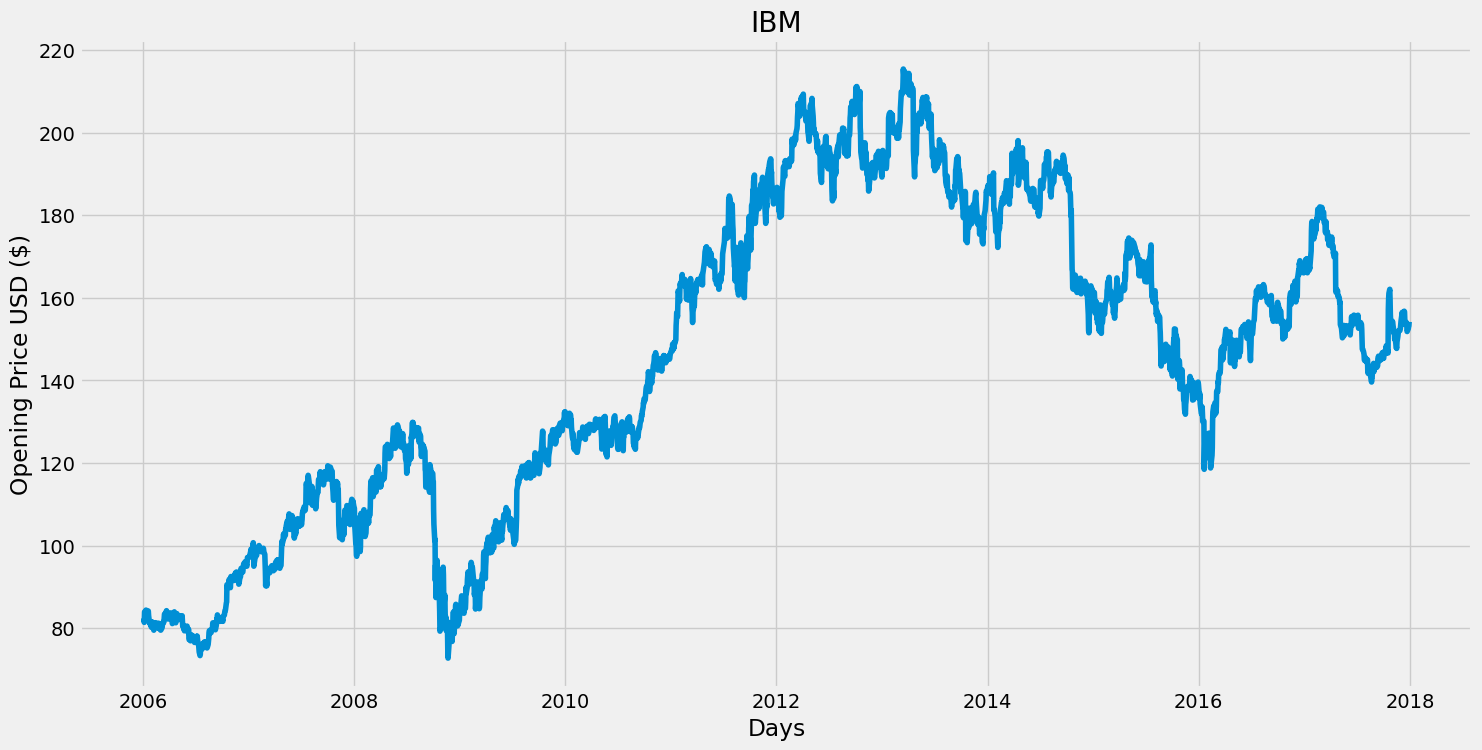

In [43]:
plt.figure(figsize=(16,8))
plt.title('IBM')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(stock_df['Open'])
plt.show()

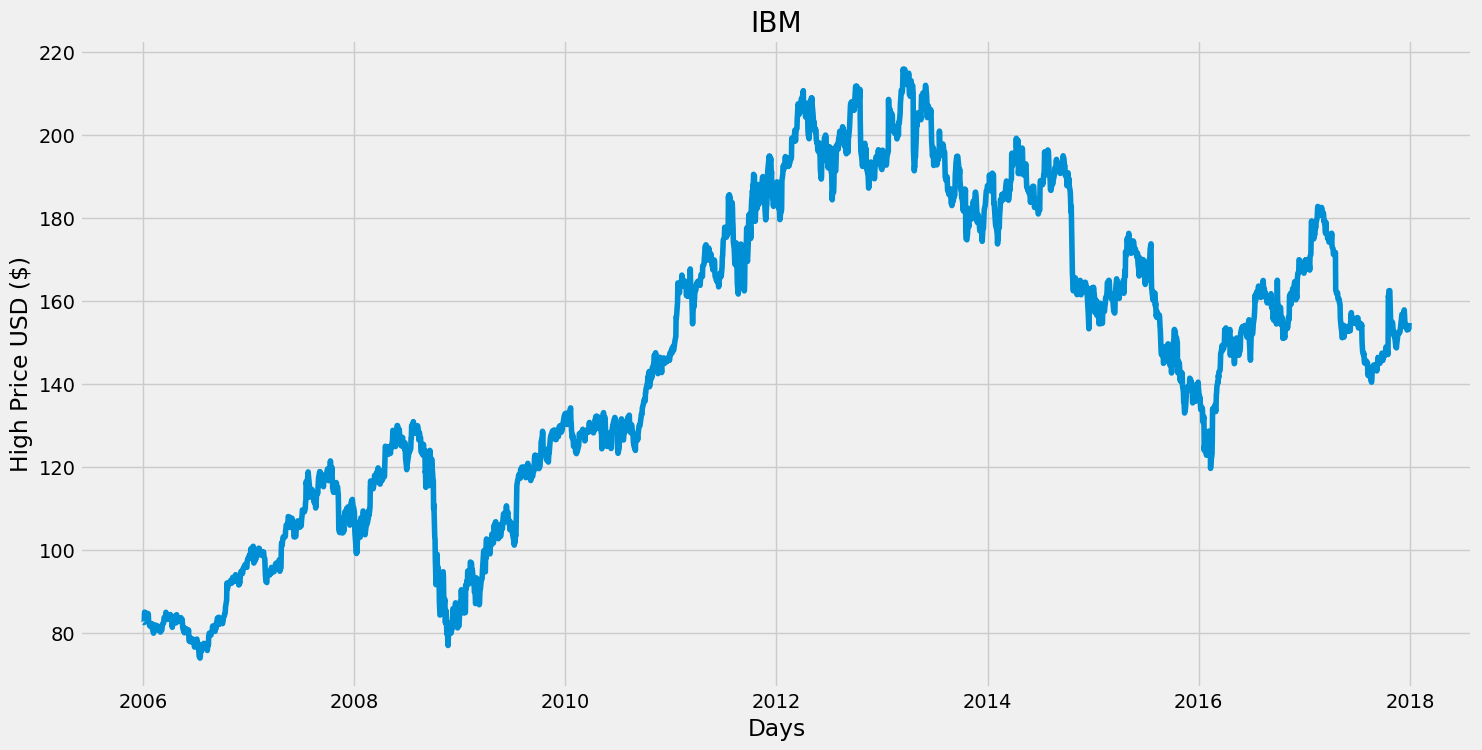

In [44]:
plt.figure(figsize=(16,8))
plt.title('IBM')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(stock_df['High'])
plt.show()

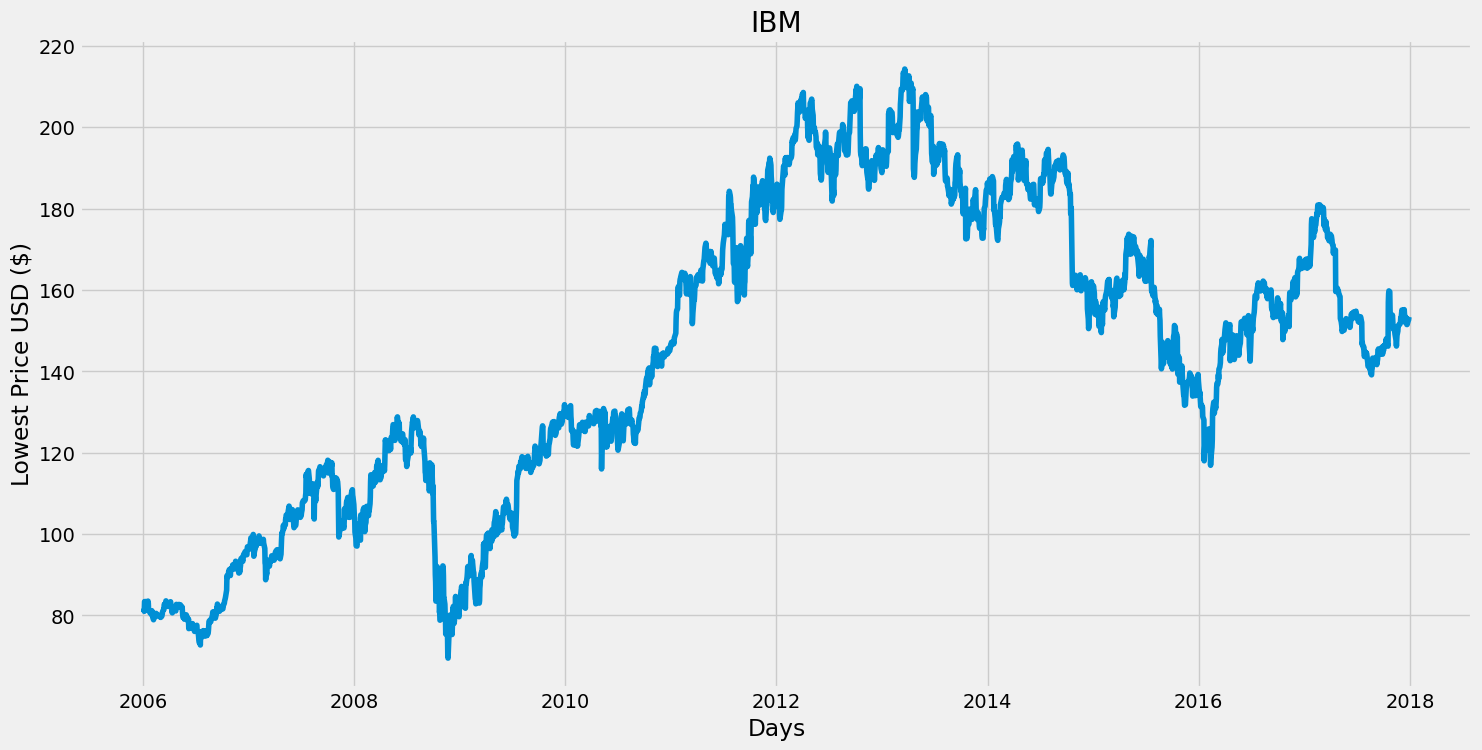

In [45]:
plt.figure(figsize=(16,8))
plt.title('IBM')
plt.xlabel('Days')
plt.ylabel('Lowest Price USD ($)')
plt.plot(stock_df['Low'])
plt.show()

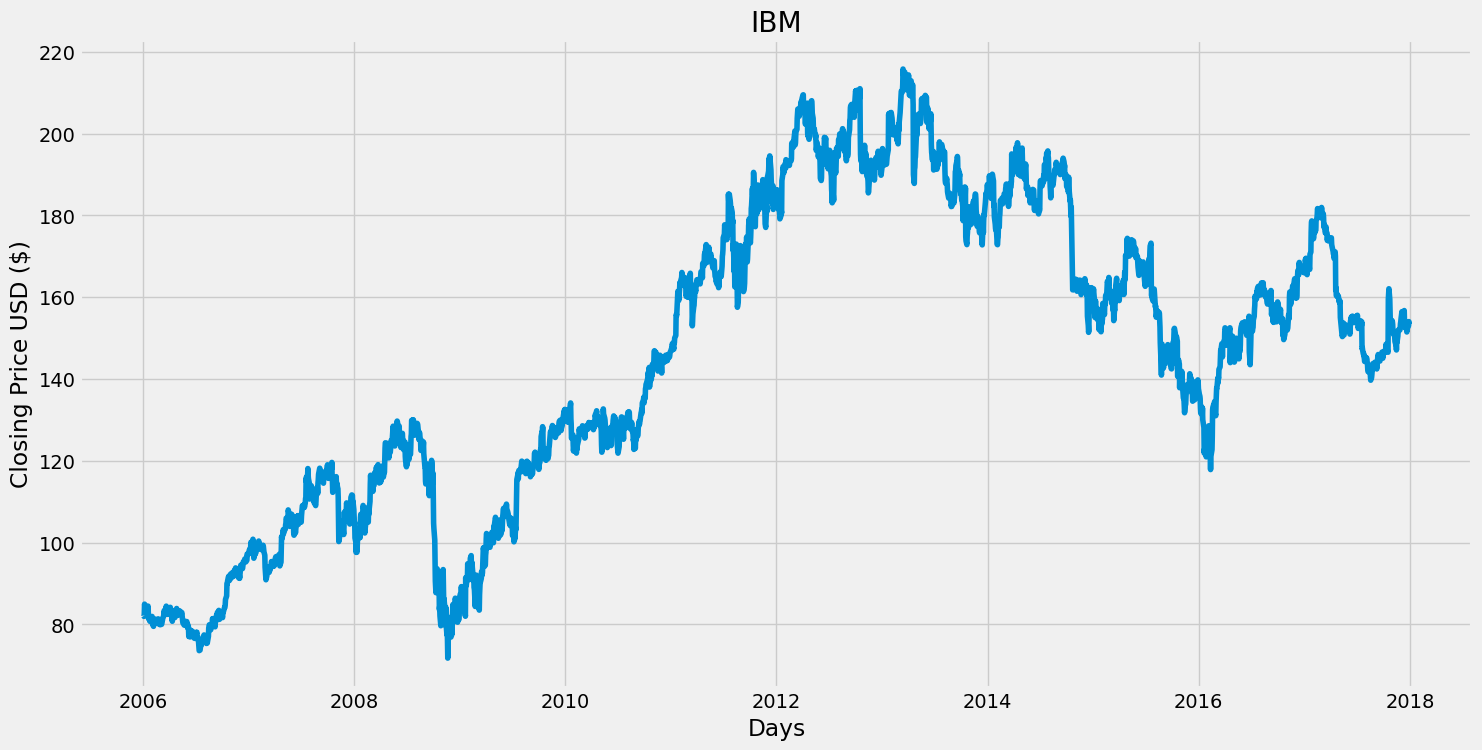

In [46]:
plt.figure(figsize=(16,8))
plt.title('IBM')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(stock_df['Close'])
plt.show()

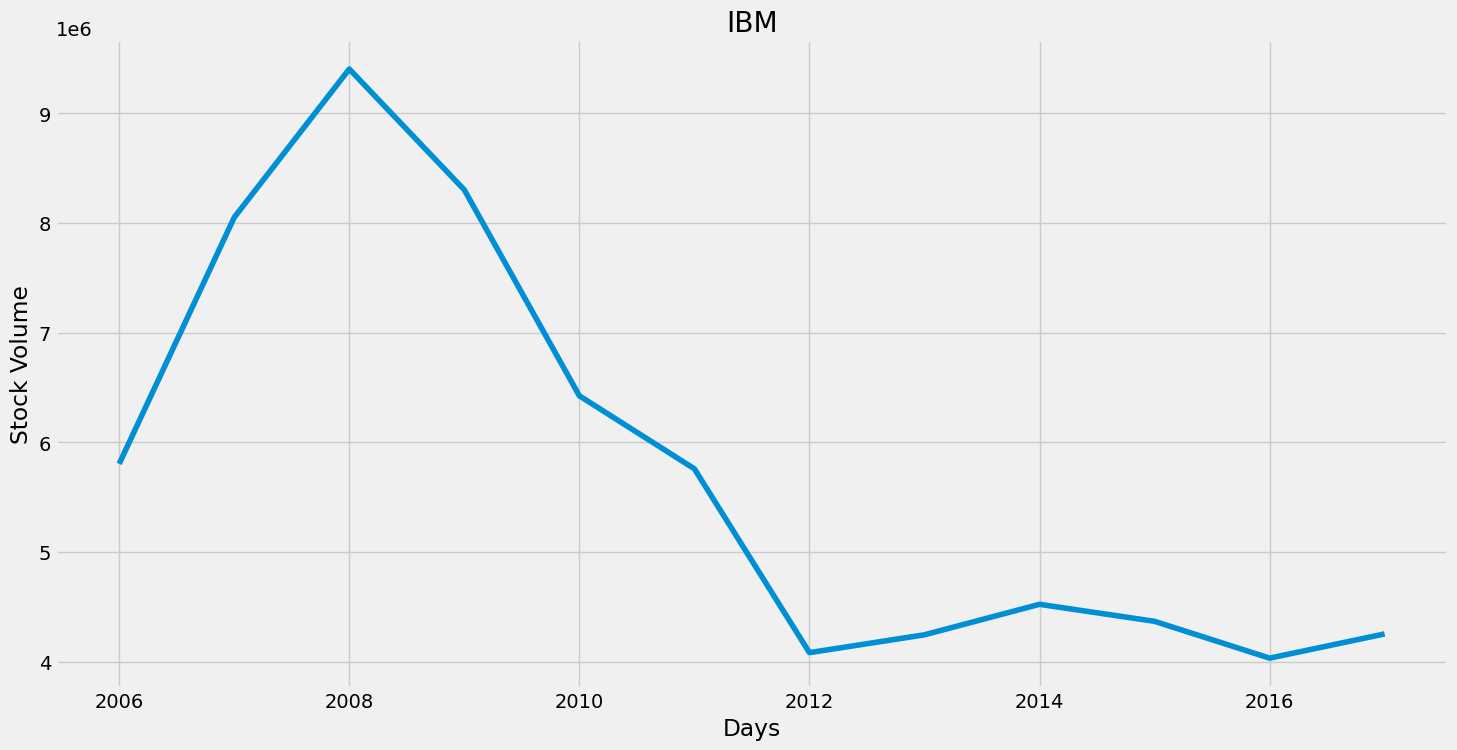

In [47]:
stock_df['Year'] = stock_df.index.year
plt.figure(figsize=(16,8))
plt.title('IBM')
plt.xlabel('Days')
plt.ylabel('Stock Volume')
plt.plot(stock_df.groupby('Year')['Volume'].mean())
plt.show()

stock_df.drop(columns=['Year'], inplace=True)

In [48]:
sc = MinMaxScaler()

x_train = sc.fit_transform(stock_df.loc[:'2016'][['High', 'Low']])
y_train = stock_df.loc[:'2016']['Close']
x_test = sc.transform(stock_df.loc['2017':][['High', 'Low']])
y_test = stock_df.loc['2017':]['Close']
print("Train Data Shape :", x_train.shape)
print("Test Data Shape :", x_test.shape)

Train Data Shape : (2769, 2)
Test Data Shape : (251, 2)


### Random Forest Regressor Model - Devyani

In [49]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=200, random_state=40)

In [50]:
random_forest.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=40)

In [51]:
y_test.head()

Date
2017-01-03    167.19
2017-01-04    169.26
2017-01-05    168.70
2017-01-06    169.53
2017-01-09    167.65
Name: Close, dtype: float64

In [52]:
rf_plot_df = pd.DataFrame(y_test)
rf_plot_df.head()

,Close
Date,
2017-01-03,167.19
2017-01-04,169.26
2017-01-05,168.70
2017-01-06,169.53
2017-01-09,167.65


In [53]:
predictions = random_forest.predict(x_test).reshape(-1,1)
rf_plot_df['Predictions'] = predictions
rf_plot_df.head()

,Close,Predictions
Date,,
2017-01-03,167.19,166.78290
2017-01-04,169.26,168.40665
2017-01-05,168.70,168.54470
2017-01-06,169.53,169.04275
2017-01-09,167.65,168.46145


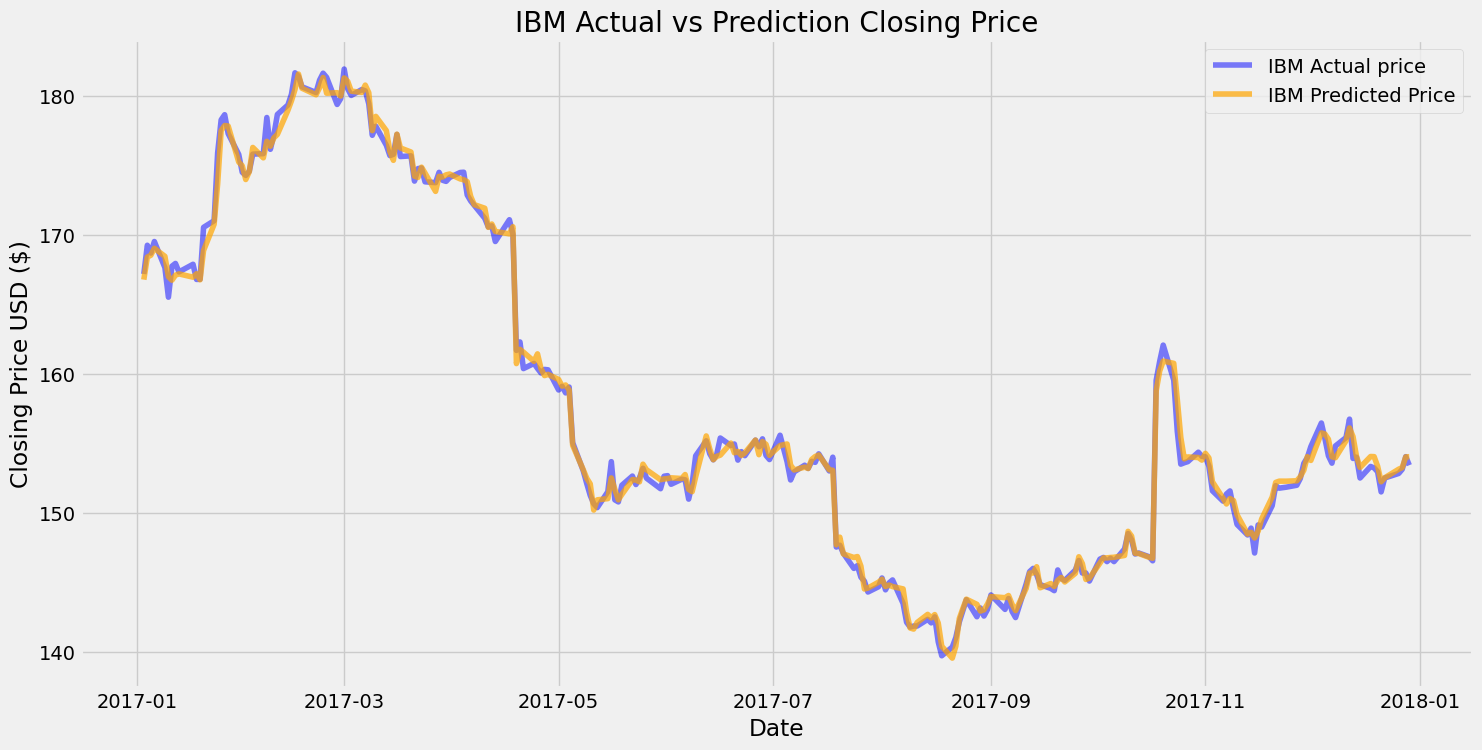

In [54]:
plt.figure(figsize=(16,8))
plt.title('IBM Actual vs Prediction Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price USD ($)')
plt.plot(rf_plot_df['Close'], color='blue', alpha=0.5, label="IBM Actual price")
plt.plot(rf_plot_df['Predictions'], color='orange', alpha=0.7, label="IBM Predicted Price")
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# assuming actual and pred are your data
rf_rmse = sqrt(mean_squared_error(rf_plot_df['Close'], rf_plot_df['Predictions']))

In [56]:
print("The root mean squared error is {}.".format(rf_rmse))

The root mean squared error is 0.6325440847115337.


### Long Short-Term Memory Model - Sanjith & Devyani

In [57]:
training_stock_df = stock_df.loc[:'2016'].iloc[:,1:2].values
test_stock_df = stock_df.loc['2017':].iloc[:,1:2].values

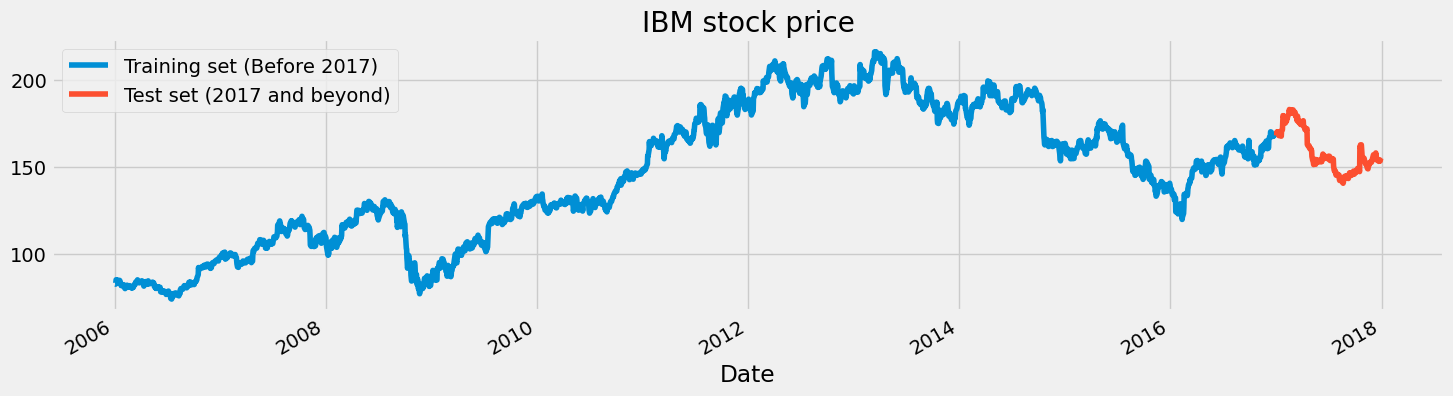

In [58]:
stock_df["High"][:'2016'].plot(figsize=(16,4),legend=True)
stock_df["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [59]:
sc = MinMaxScaler(feature_range=(0,1))
training_stock_df_scaled = sc.fit_transform(training_stock_df)

In [60]:
X_train = []
y_train = []
for i in range(60,len(training_stock_df_scaled)):
    X_train.append(training_stock_df_scaled[i-60:i,0])
    y_train.append(training_stock_df_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [61]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [62]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD

In [63]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 27s 134ms/step - loss: 0.0203
Epoch 2/50
85/85 [==============================] - 10s 120ms/step - loss: 0.0099
Epoch 3/50
85/85 [==============================] - 10s 118ms/step - loss: 0.0078
Epoch 4/50
85/85 [==============================] - 9s 111ms/step - loss: 0.0064
Epoch 5/50
85/85 [==============================] - 10s 119ms/step - loss: 0.0062
Epoch 6/50
85/85 [==============================] - 11s 124ms/step - loss: 0.0056
Epoch 7/50
85/85 [==============================] - 11s 134ms/step - loss: 0.0053
Epoch 8/50
85/85 [==============================] - 11s 124ms/step - loss: 0.0048
Epoch 9/50
85/85 [==============================] - 10s 121ms/step - loss: 0.0046
Epoch 10/50
85/85 [==============================] - 9s 108ms/step - loss: 0.0043
Epoch 11/50
85/85 [==============================] - 10s 118ms/step - loss: 0.0041
Epoch 12/50
85/85 [==============================] - 10s 119ms/step - loss: 0.0038
Epoch 13/50
85/

In [64]:
dataset_total = pd.concat((stock_df["High"][:'2016'],stock_df["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_stock_df) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [65]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
lstm_predicted_stock_price = regressor.predict(X_test)
lstm_predicted_stock_price = sc.inverse_transform(lstm_predicted_stock_price)

8/8 [==============================] - 2s 28ms/step


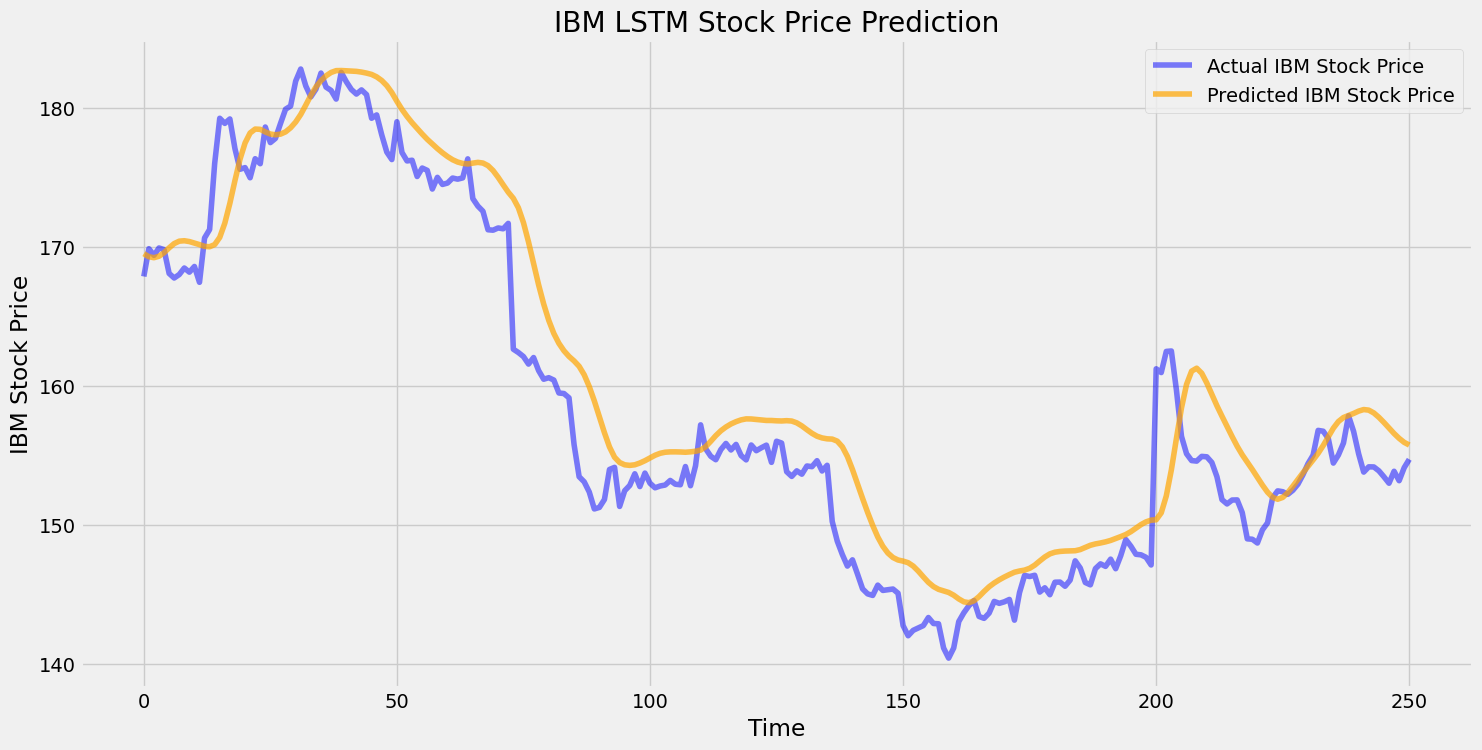

In [66]:
plt.figure(figsize=(16,8))
plt.plot(test_stock_df, color='blue', alpha=0.5,label='Actual IBM Stock Price')
plt.plot(lstm_predicted_stock_price, color='orange', alpha=0.7,label='Predicted IBM Stock Price')
plt.title('IBM LSTM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

In [67]:
lstm_rmse = math.sqrt(mean_squared_error(test_stock_df, lstm_predicted_stock_price))
print("The root mean squared error is {}.".format(lstm_rmse))

The root mean squared error is 3.6972608999276835.


### ARIMA - Sanjith

#### Understanding the distribution of the data

<Axes: ylabel='Density'>

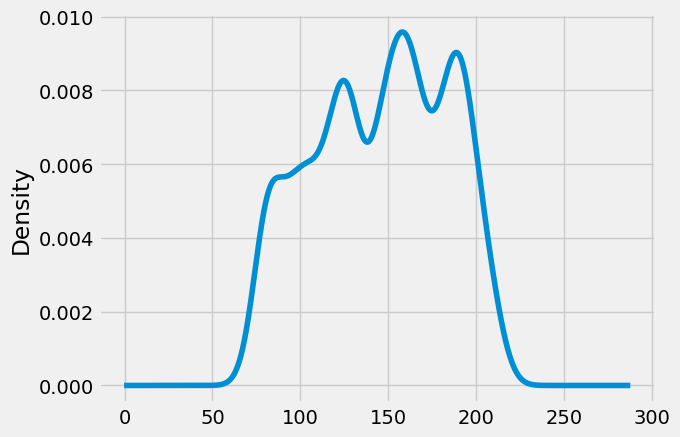

In [68]:
stock_df['Close'].plot(kind='kde')

In [69]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.3 MB/s eta 0:00:00


In [70]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error

In [71]:
def stationarityCheck(priceData):
    #Determing rolling statistics
    rolmean = priceData.rolling(12).mean()
    rolstd = priceData.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(priceData, color='blue', alpha=0.5 ,label='Original')
    plt.plot(rolmean, color='red', alpha=0.5, label='Rolling Mean')
    plt.plot(rolstd, color='orange', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(priceData,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

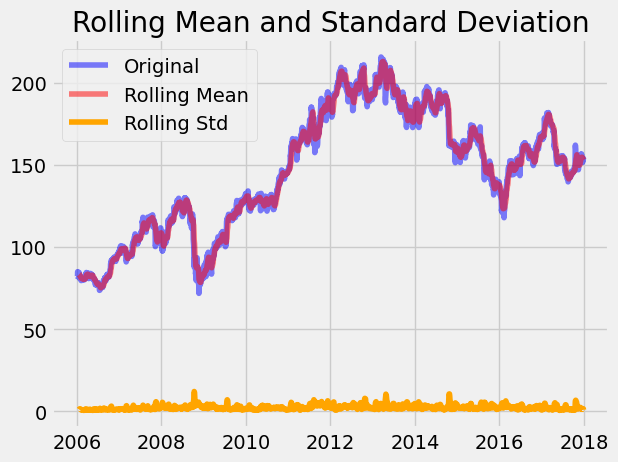

Results of dickey fuller test
Test Statistics                  -1.763880
p-value                           0.398536
No. of lags used                 10.000000
Number of observations used    3009.000000
critical value (1%)              -3.432525
critical value (5%)              -2.862501
critical value (10%)             -2.567282
dtype: float64


In [72]:
stationarityCheck(stock_df['Close'])

#### Removing Trend and Seasonality from the Data

<Figure size 640x480 with 0 Axes>

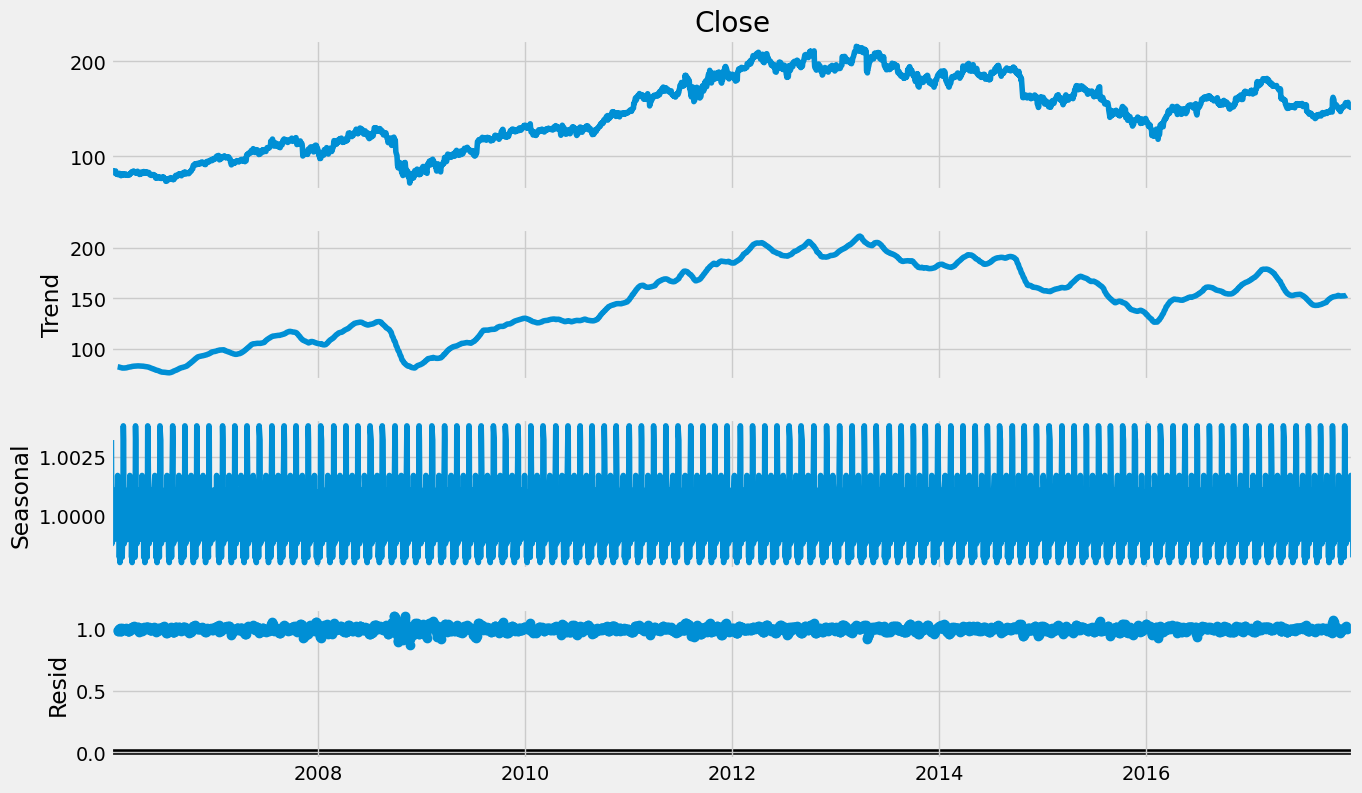

In [73]:
result = seasonal_decompose(stock_df['Close'], model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

#### Taking log values of the close price data to reduce magnitude of values and the trends in the series

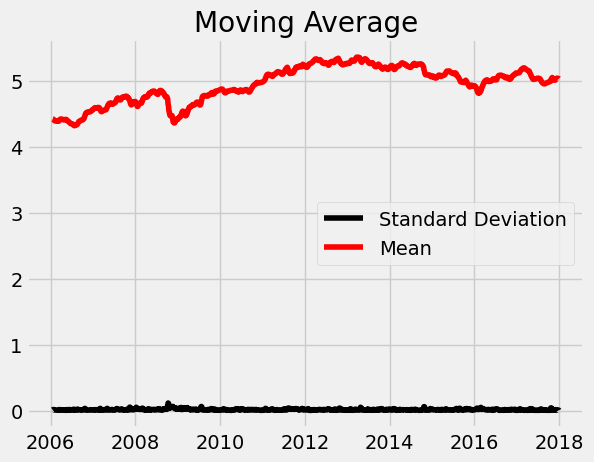

In [74]:
stock_close_log_price = np.log(stock_df['Close'])
moving_avg = stock_close_log_price.rolling(12).mean()
std_dev = stock_close_log_price.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

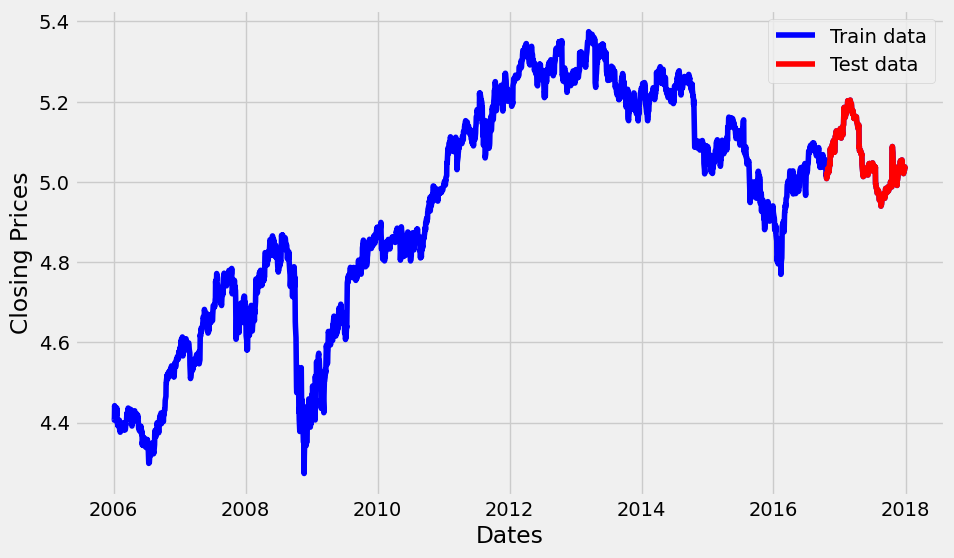

In [75]:
train_data, test_data = stock_close_log_price[3:int(len(stock_close_log_price)*0.9)], stock_close_log_price[int(len(stock_close_log_price)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(stock_close_log_price, 'blue', label='Train data')
plt.plot(test_data, 'red', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15513.289, Time=0.74 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15511.798, Time=1.41 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15511.809, Time=3.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15514.660, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15509.807, Time=2.77 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 8.565 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2715
Model:               SARIMAX(0, 1, 0)   Log Likelihood                7758.330
Date:                Sun, 21 Apr 2024   AIC                         -15514.660
Time:                        01:02:24   BIC                         -15508.753
Sample:                             0   HQIC                        -15512.524
                               - 2715                             

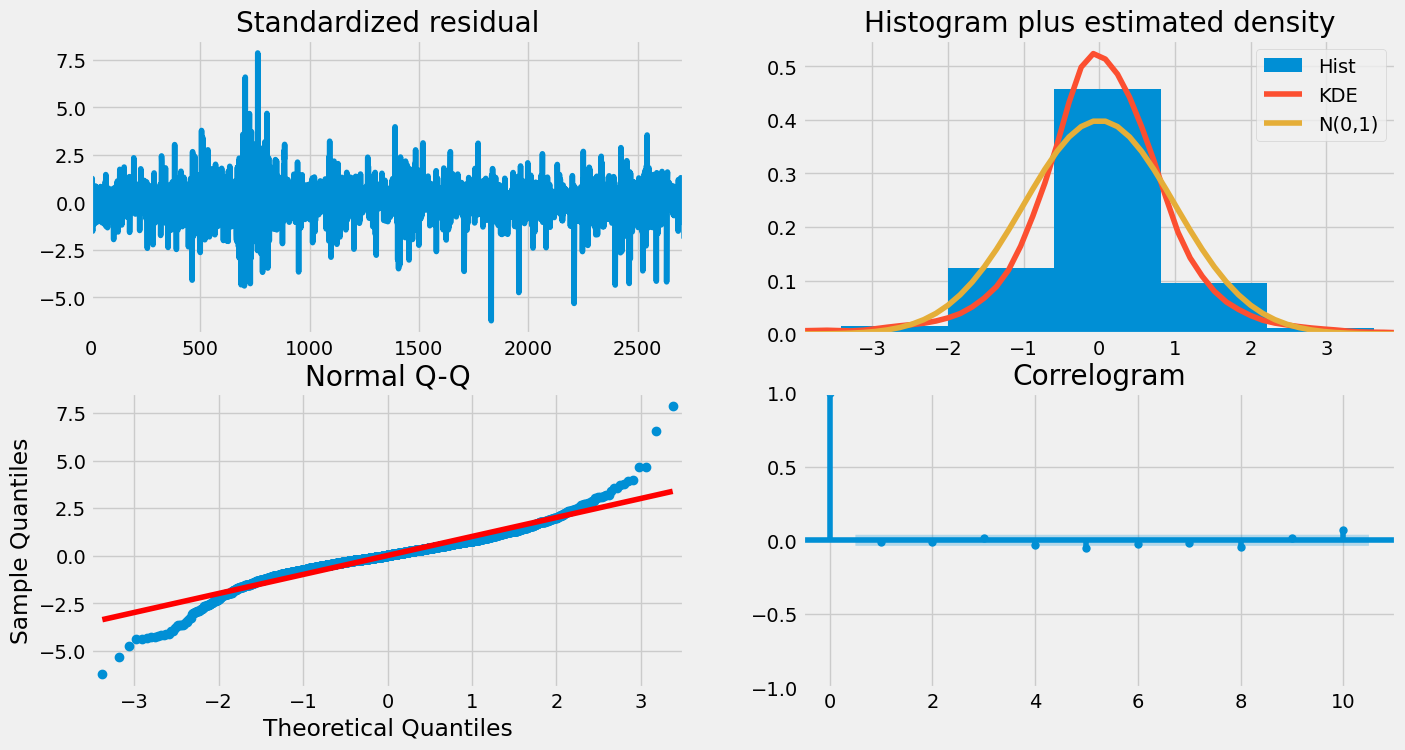

In [76]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [77]:
arima = ARIMA(train_data, order=(0,1,0))
fitted = arima.fit()
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2715
Model:                 ARIMA(0, 1, 0)   Log Likelihood                7758.330
Date:                Sun, 21 Apr 2024   AIC                         -15514.660
Time:                        01:02:26   BIC                         -15508.753
Sample:                             0   HQIC                        -15512.524
                               - 2715                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002    2.7e-06     71.168      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):              3404.02
Prob(Q):                              0.48   Pr

In [78]:
forecast_data = fitted.forecast(302, alpha=0.05)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [79]:
forecast_data = forecast_data.reset_index(drop=True)
forecast_data

0      5.015424
1      5.015424
2      5.015424
3      5.015424
4      5.015424
         ...   
297    5.015424
298    5.015424
299    5.015424
300    5.015424
301    5.015424
Name: predicted_mean, Length: 302, dtype: float64

In [80]:
arima_plot_df = pd.DataFrame(test_data)
arima_plot_df.reset_index(inplace=True)
arima_plot_df['Predictions'] = forecast_data
arima_plot_df.set_index('Date', inplace=True)
arima_plot_df.head()

,Close,Predictions
Date,,
2016-10-19,5.019000,5.015424
2016-10-20,5.020718,5.015424
2016-10-21,5.008166,5.015424
2016-10-24,5.014428,5.015424
2016-10-25,5.016485,5.015424


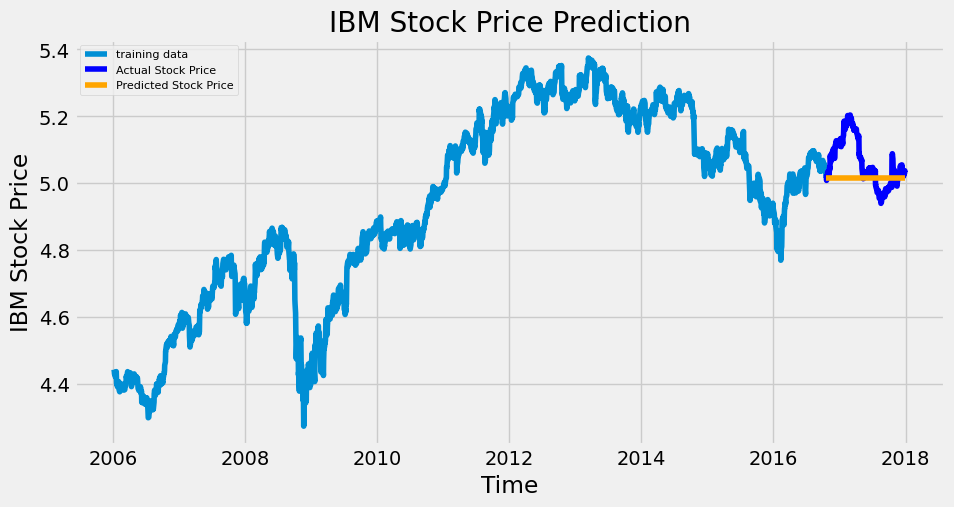

In [81]:
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(arima_plot_df['Close'], color = 'blue', label='Actual Stock Price')
plt.plot(arima_plot_df['Predictions'], color = 'orange',label='Predicted Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [82]:
arima_rmse = sqrt(mean_squared_error(arima_plot_df['Close'], arima_plot_df['Predictions']))
print("The root mean squared error is {}.".format(arima_rmse))

The root mean squared error is 0.08395526804553652.
